In [20]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import scipy.io
from scipy import interpolate
import scipy.ndimage
import xarray as xr
import pickle
import matplotlib as mpl

In [ ]:
# This is the colormap made in SurferClr2Cmap.ipynb from NorthCore_ElevationShader_v2.clr
fp = open('cmap_ncb.pkl', 'rb')
cmap_ncb = pickle.load(fp)
fp.close()

# This makes NaN gray
tcmap=cmap_ncb
tcmap.set_bad(color='darkgray')

# This is the difference color map
dcmap = cm.seismic.copy()
dcmap.set_bad(color='darkgray')
dcmap

In [34]:
# load and plot the elevation map
ddir = "D:/crs/proj/2024_Sandwich_Surveys/lidar/"
fname = ddir+"2023-0280FA-Sandwich_lidar_-20231221-100303_average.tif"
ds = xr.open_dataset(fname, chunks={'x':256, 'y':256})
ds

<xarray.Dataset>
Dimensions:      (band: 1, x: 4816, y: 4377)
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 3.763e+05 3.763e+05 ... 3.775e+05 3.775e+05
  * y            (y) float64 4.625e+06 4.625e+06 ... 4.624e+06 4.624e+06
    spatial_ref  int32 ...
Data variables:
    band_data    (band, y, x) float32 dask.array<chunksize=(1, 256, 256), meta=np.ndarray>

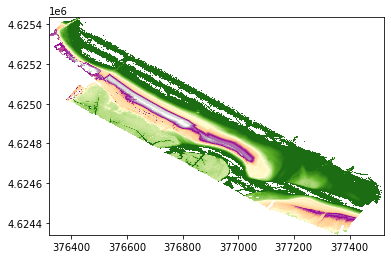

In [35]:
plt.pcolormesh(ds.x, ds.y, np.squeeze( ds.band_data ), cmap=cmap_ncb, vmin=0., vmax=6. )
plt.show()

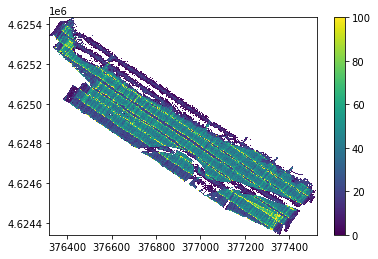

In [33]:
fname = ddir+"2023-0280FA-Sandwich_lidar_-20231221-100303_counter32.tif"
dsc = xr.open_dataset(fname, chunks={'x':256, 'y':256})
plt.pcolormesh(dsc.x, dsc.y, np.squeeze( dsc.band_data ), 
               cmap=mpl.colormaps["viridis"], vmin=0, vmax=100 )
plt.colorbar()
plt.show()

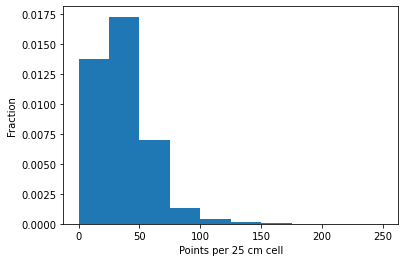

In [32]:
plt.hist(np.ravel( dsc['band_data'] ), bins = [0,25,50,75,100,125,150,175,200,225,250], 
         density=True)
plt.xlabel('Points per 25 cm cell')
plt.ylabel('Fraction')
plt.show()